In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\fichiers_csv\insurance.csv")

In [3]:
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [4]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

age Age in years integer

gender Male or Female integer (1 or 2)

bmi Body mass index float

no_of_children Number of children integer

smoker Whether smoker or not integer (0 or 1)

region Which US region - NW, NE, SW, SE integer (1,2,3 or 4 respectively)

charges Annual Insurance charges in USD float

In [5]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [6]:
df.replace('?', np.nan, inplace=True)

In [7]:
df.isna().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [8]:
df.dtypes

age                object
gender              int64
bmi               float64
no_of_children      int64
smoker             object
region              int64
charges           float64
dtype: object

In [9]:
# age
mean_age = df["age"].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# smoker
smoker = df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.nan, smoker, inplace=True)

df[["age","smoker"]] = df[["age","smoker"]].astype("int")

In [10]:
df.dtypes

age                 int32
gender              int64
bmi               float64
no_of_children      int64
smoker              int32
region              int64
charges           float64
dtype: object

# Analyse univariée

# Age

In [11]:
df["age"].describe()

count    2771.000000
mean       39.116925
std        14.078815
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<Axes: >

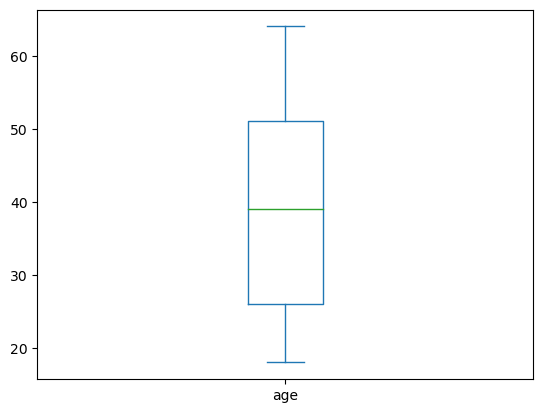

In [12]:
df["age"].plot(kind='box')

C:\Users\nico_\AppData\Local\Temp\ipykernel_4028\3633397083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"], hist=True)


<Axes: xlabel='age', ylabel='Density'>

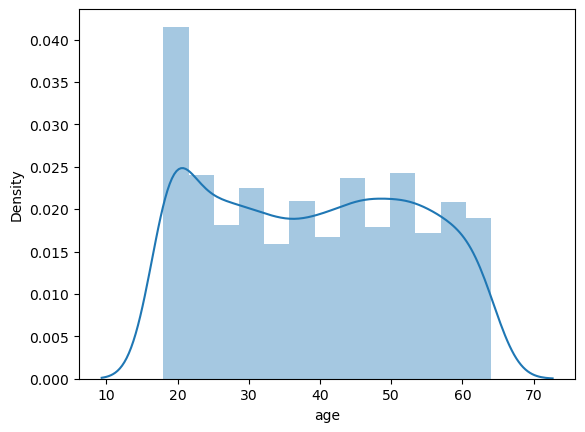

In [13]:
sns.distplot(df["age"], hist=True)

# gender

In [14]:
df["gender"].describe()

count    2771.000000
mean        1.507398
std         0.500036
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: gender, dtype: float64

In [15]:
df["gender"].value_counts()

gender
2    1406
1    1365
Name: count, dtype: int64

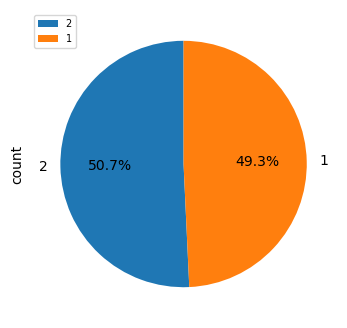

In [16]:
df["gender"].value_counts().plot(kind="pie", startangle = 90, figsize=(4,4), autopct='%1.1f%%')
plt.legend(labels=df["gender"].value_counts().index, loc='upper left', fontsize=7)
plt.show()

<Axes: xlabel='gender'>

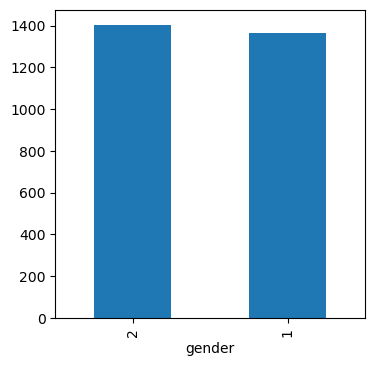

In [17]:
df["gender"].value_counts().plot(kind="bar", figsize=(4,4))

# bmi

In [18]:
df["bmi"].describe()

count    2771.000000
mean       30.702360
std         6.130324
min        15.960000
25%        26.220000
50%        30.495000
75%        34.770000
max        53.130000
Name: bmi, dtype: float64

C:\Users\nico_\AppData\Local\Temp\ipykernel_4028\897776905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"], hist=True)


<Axes: xlabel='bmi', ylabel='Density'>

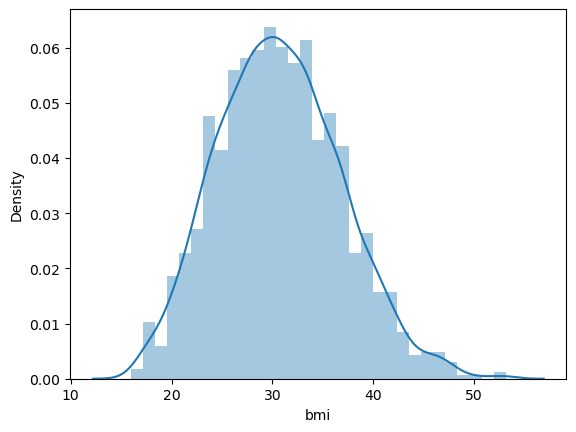

In [19]:
sns.distplot(df["bmi"], hist=True)

# no_of_children

In [20]:
df["no_of_children"].value_counts()

no_of_children
0    1185
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

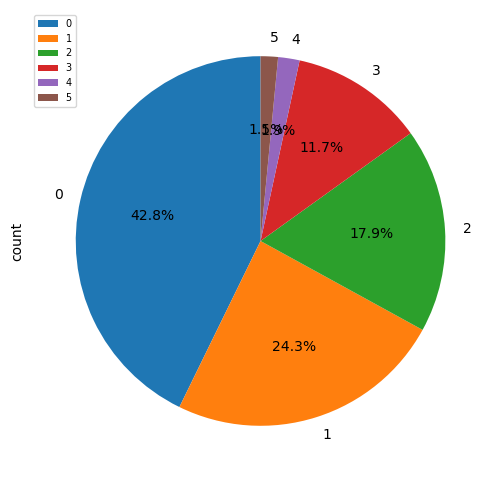

In [21]:
df["no_of_children"].value_counts().plot(kind="pie", startangle=90, figsize=(6,6), autopct='%1.1f%%')
plt.legend(labels=df["no_of_children"].value_counts().index, loc='upper left', fontsize=7)
plt.show()

# smoker

In [22]:
df["smoker"].value_counts()

smoker
0    2208
1     563
Name: count, dtype: int64

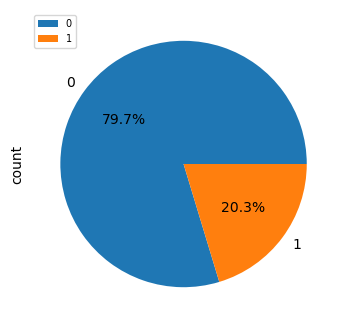

In [23]:
df["smoker"].value_counts().plot(kind="pie", figsize=(4,4), autopct='%1.1f%%')
plt.legend(labels=df["smoker"].value_counts().index, loc='upper left', fontsize=7)
plt.show()

#  region

In [24]:
df["region"].value_counts()

region
4    766
3    683
1    664
2    658
Name: count, dtype: int64

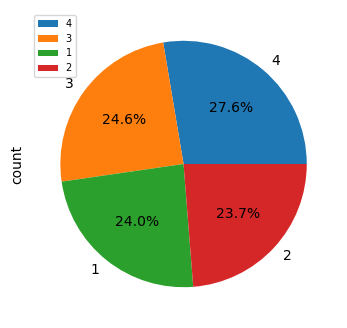

In [25]:
df["region"].value_counts().plot(kind="pie", figsize=(4,4), autopct='%1.1f%%')
plt.legend(labels=df["region"].value_counts().index, loc='upper left', fontsize=7)
plt.show()

# charges

In [26]:
df["charges"].describe()

count     2771.000000
mean     13260.062289
std      12153.767132
min       1121.873900
25%       4687.797000
50%       9304.701900
75%      16516.743675
max      63770.428010
Name: charges, dtype: float64

C:\Users\nico_\AppData\Local\Temp\ipykernel_4028\3737380063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"], hist=True)


<Axes: xlabel='charges', ylabel='Density'>

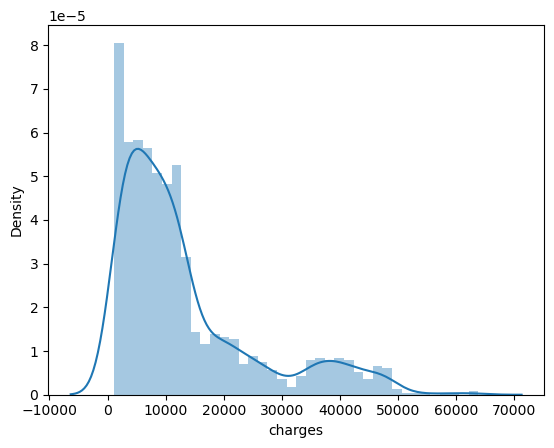

In [27]:
sns.distplot(df["charges"], hist=True)

# Analyse bivariée entre les features et le prix

In [28]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


Absence de colinéarité

In [145]:
from scipy import stats

In [30]:
features = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
for i in features:
    pearson_coef, p_value = stats.pearsonr(df[i],df["charges"])
    print(i, ":")
    print("pearson_coef = ", pearson_coef)
    print("p_value = ", p_value)

age :
pearson_coef =  0.2988922484827551
p_value =  2.720479375012357e-58
gender :
pearson_coef =  0.062958728083348
p_value =  0.0009132885046571812
bmi :
pearson_coef =  0.1999059940416661
p_value =  2.260968145212516e-26
no_of_children :
pearson_coef =  0.06655089735542266
p_value =  0.0004556400827044314
smoker :
pearson_coef =  0.789140696205806
p_value =  0.0
region :
pearson_coef =  0.05401797096065053
p_value =  0.0044506977722686344


La prix est corrélée à 78% à la consommation de tabac avec une certitude proche de 0% donc le tabac influe sur le prix de l'assurance.

<function matplotlib.pyplot.show(close=None, block=None)>

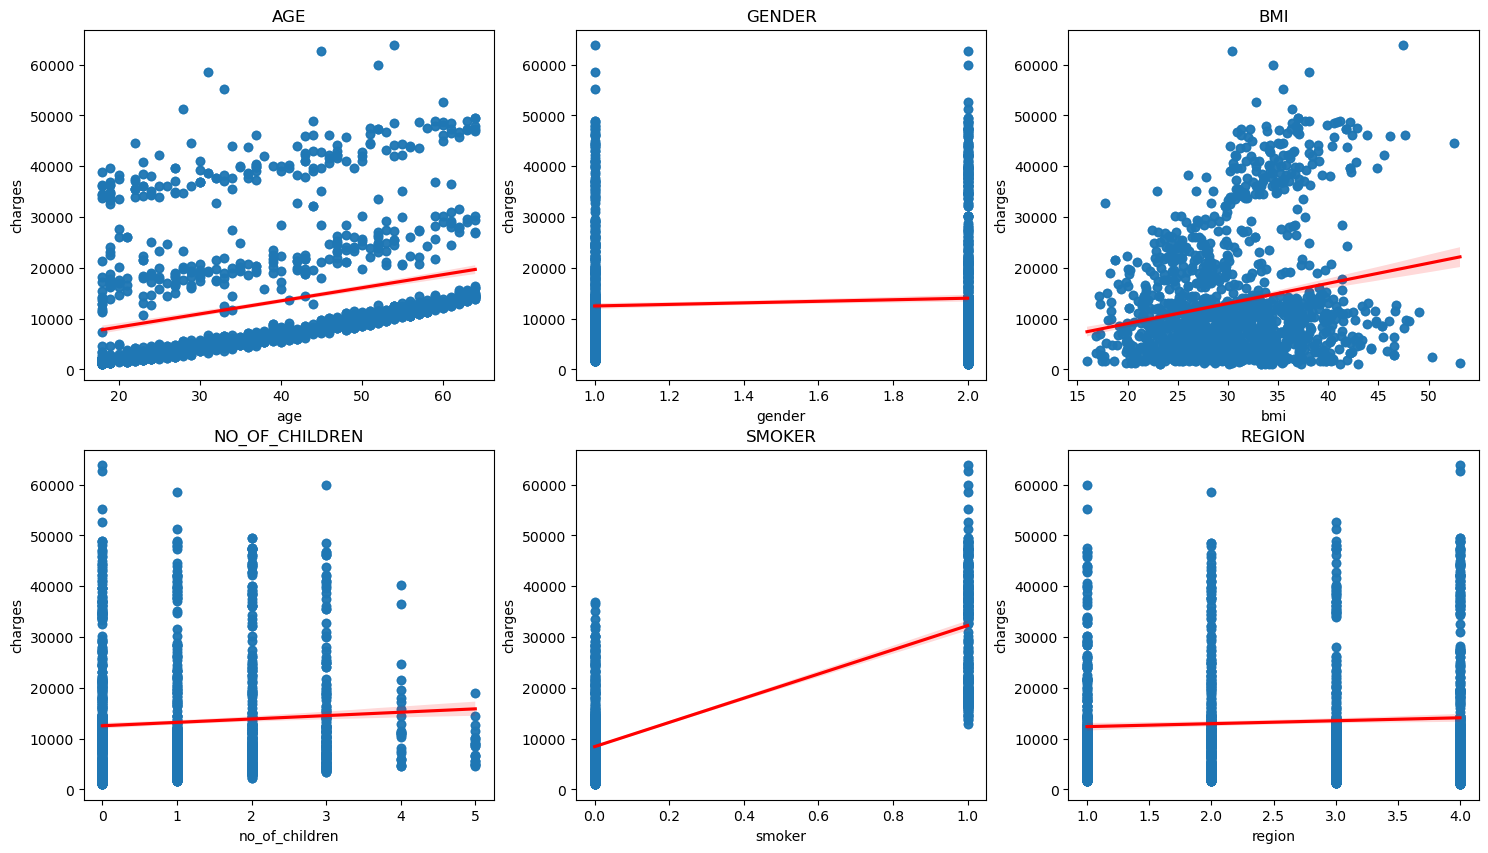

In [31]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
sns.regplot(ax=axes[0,0], x='age', y='charges', data=df, line_kws={"color": "red"})
axes[0,0].set_title('AGE')
sns.regplot(ax=axes[0,1], x='gender', y='charges', data=df, line_kws={"color": "red"})
axes[0,1].set_title('GENDER')
sns.regplot(ax=axes[0,2], x='bmi', y='charges', data=df, line_kws={"color": "red"})
axes[0,2].set_title('BMI')
sns.regplot(ax=axes[1,0], x='no_of_children', y='charges', data=df, line_kws={"color": "red"})
axes[1,0].set_title('NO_OF_CHILDREN')
sns.regplot(ax=axes[1,1], x='smoker', y='charges', data=df, line_kws={"color": "red"})
axes[1,1].set_title('SMOKER')
sns.regplot(ax=axes[1,2], x='region', y='charges', data=df, line_kws={"color": "red"})
axes[1,2].set_title('REGION')
plt.show

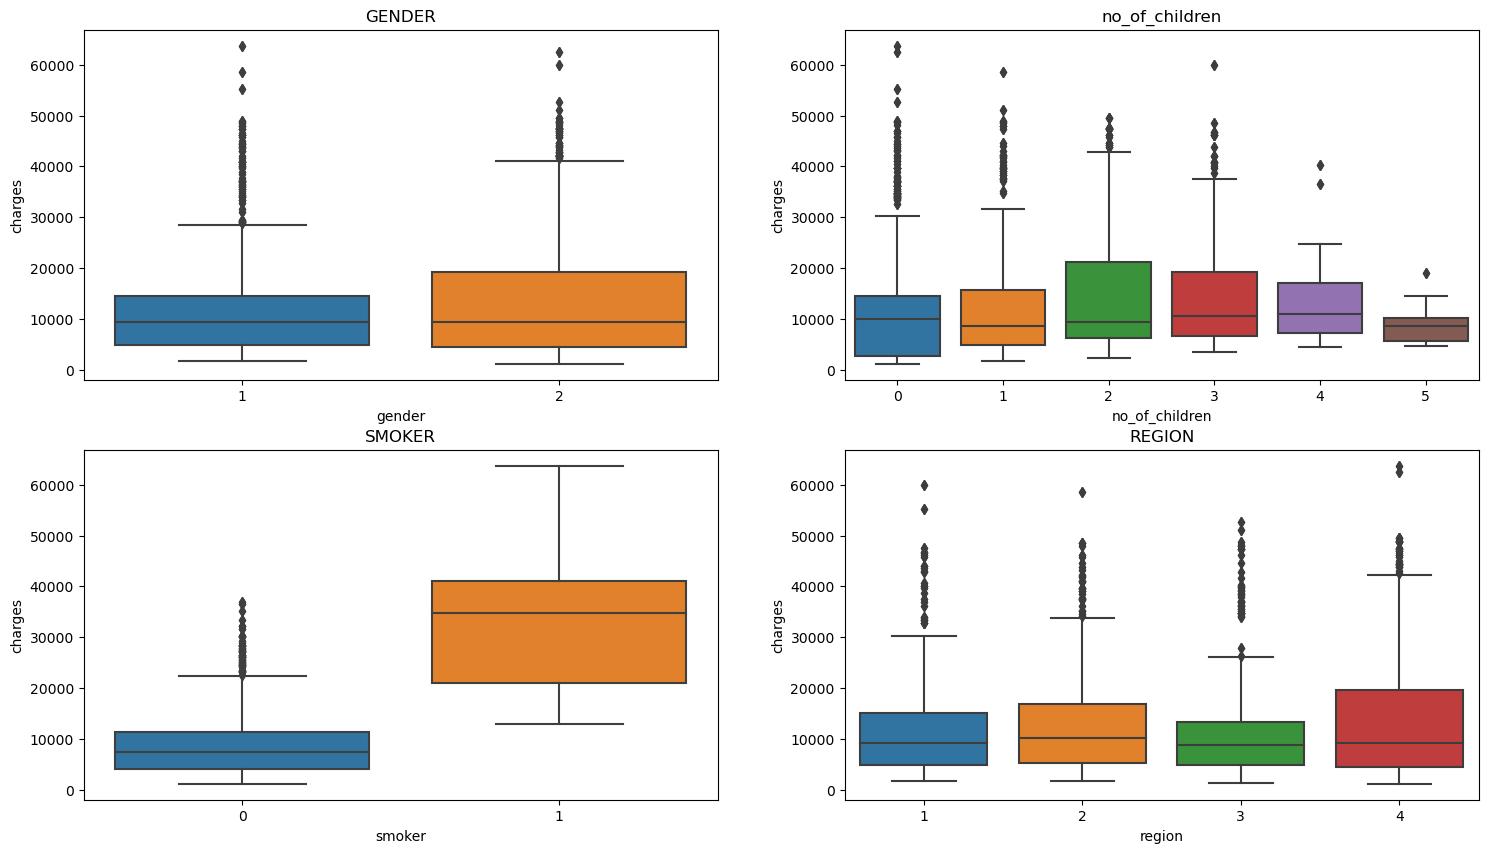

In [32]:
fig, axes = plt.subplots(2,2, figsize=(18,10))
sns.boxplot(ax = axes[0,0], x = 'gender', y = 'charges', data=df)
axes[0,0].set_title('GENDER')
sns.boxplot(ax = axes[0,1], x = 'no_of_children', y = 'charges', data=df)
axes[0,1].set_title('no_of_children')
sns.boxplot(ax = axes[1,0], x = 'smoker', y = 'charges', data=df)
axes[1,0].set_title('SMOKER')
sns.boxplot(ax = axes[1,1], x = 'region', y = 'charges', data=df)
axes[1,1].set_title('REGION')
plt.show()

Les boxplot montrent que la consommation de tabac influe sur les prix

# Groupby

In [33]:
df_group = df[['gender', 'no_of_children', 'smoker','region']]

for i in df_group:
    plot = df["charges"].groupby(df[i]).mean()
    print(i, ":")
    print(plot)

gender :
gender
1    12483.609931
2    14013.872721
Name: charges, dtype: float64
no_of_children :
no_of_children
0    12314.066870
1    12722.650521
2    15268.182723
3    15304.070620
4    13550.983876
5     8706.036629
Name: charges, dtype: float64
smoker :
smoker
0     8417.874411
1    32250.383486
Name: charges, dtype: float64
region :
region
1    12463.129315
2    13475.874737
3    12157.284681
4    14748.777706
Name: charges, dtype: float64


Les moyennes des prix par classes montrent que la consommation de tabac influe sur les prix

# Données ordinales

# Corrélation de rang de Spearman

Adapté pour les distributions non linéaires et aux valeurs aberrantes

In [34]:
X_ord = df[["no_of_children","region"]]
y = df["charges"]

In [35]:
spearman_corr, _ = scipy.stats.spearmanr(X_ord, y)
spearman_corr

array([[ 1.        , -0.02898859,  0.13202789],
       [-0.02898859,  1.        , -0.00393357],
       [ 0.13202789, -0.00393357,  1.        ]])

In [36]:
columns = ["no_of_children", "region", "y"]
index = ["no_of_children", "region", "y"]

df_spearman = pd.DataFrame(spearman_corr, columns=columns, index=index)

print("Matrice de Corrélation de Spearman :")
print(df_spearman)

Matrice de Corrélation de Spearman :
                no_of_children    region         y
no_of_children        1.000000 -0.028989  0.132028
region               -0.028989  1.000000 -0.003934
y                     0.132028 -0.003934  1.000000


Le nombre d'enfant et la région n'ont pas d'influence significative sur le prix de l'assurance

# Données binaires

# Coefficient de corrélation bisériale

Le coefficient de corrélation bisériale mesure la différence de moyenne entre les deux groupes définis par la variable binaire, ajustée par l'écart-type global de la variable continue.

# Gender

In [37]:
point_biserial_corr, _ = scipy.stats.pointbiserialr(df["gender"], y)
point_biserial_corr

0.062958728083348

Le genre n'a pas d'impact sur le prix

# Smoker

In [38]:
point_biserial_corr, _ = scipy.stats.pointbiserialr(df["smoker"], y)
point_biserial_corr

0.789140696205806

Etre fumeur a un impact sur le prix

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)

X = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]

model.fit(X, y)

feature_importances = model.feature_importances_

for i, col in enumerate(X.columns):
    print(f"Variable : {col}, Importance : {feature_importances[i]}")

Variable : age, Importance : 0.12496189629448826
Variable : gender, Importance : 0.005392945481676074
Variable : bmi, Importance : 0.2126697245953372
Variable : no_of_children, Importance : 0.01819403147353613
Variable : smoker, Importance : 0.6242230595387877
Variable : region, Importance : 0.014558342616174579


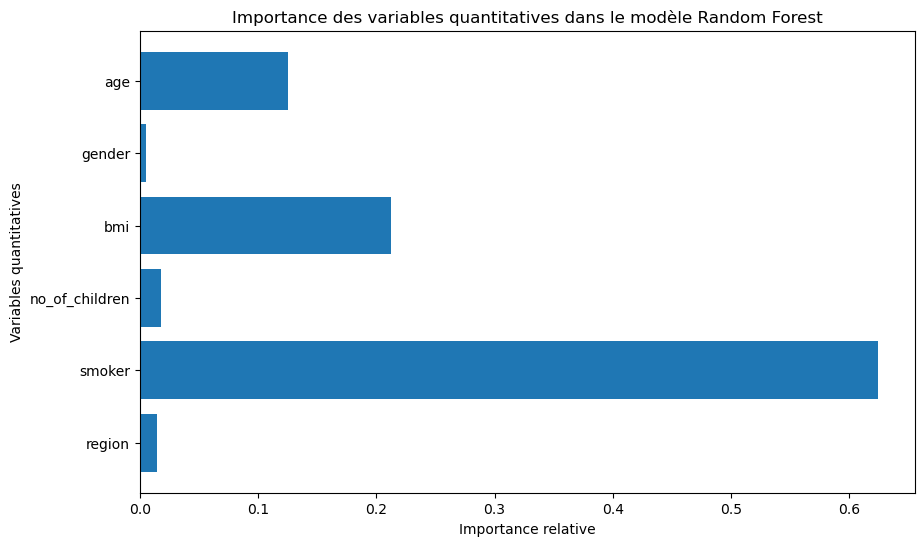

In [40]:
# Obtenez les noms des variables quantitatives
columns = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']

# Créez un graphique à barres pour visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(columns, feature_importances)
plt.xlabel('Importance relative')
plt.ylabel('Variables quantitatives')
plt.title('Importance des variables quantitatives dans le modèle Random Forest')
plt.gca().invert_yaxis()  # Inverser l'ordre des variables
plt.show()

Le statut de fumeur est un facteur très important dans la prédiction du modèle.
Le bmi a également une importance significative.
L'âge a une importance relativement plus faible.

# Train Test Split

In [41]:
X_total = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
y = df["charges"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_total,y, test_size=0.2, random_state=1)

# Standardisation

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

# Regression linéaire

# Smoker

In [44]:
lr = LinearRegression()
lr.fit(x_train[["smoker"]],y_train)
lr.score(x_train[["smoker"]],y_train)

0.6313358040621517

Le modèle de régression linéaire a une certaine capacité à expliquer la variation de la variable cible (y) en fonction de la variable smoker. La variance du prix peut être expliquée par la variable smoker 

In [45]:
lr.coef_

array([24077.59631787])

In [46]:
lr.intercept_

8338.161635498305

In [47]:
y_train_pred = lr.predict(x_train[["smoker"]])
y_predicted = lr.predict(x_test[["smoker"]])

# Calcul des scores R-squared pour l'ensemble d'entraînement et de test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_predicted)

print(f"R-squared sur l'ensemble d'entraînement : {r2_train}")
print(f"R-squared sur l'ensemble de test : {r2_test}")

R-squared sur l'ensemble d'entraînement : 0.6313358040621517
R-squared sur l'ensemble de test : 0.5856931924125184


Pas de surajustement du modèle

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 57992662.794357724
rmse =  7615.29137947838
mae = 5797.255625604682


In [49]:
df["charges"].mean()

13260.06228887694

In [50]:
taux_diff_rmse = np.sqrt(mse)*100/y_test.mean()
print(round(taux_diff_rmse),'%')

58 %


L'erreur quadratique représente 58% de la moyenne des prix

In [51]:
taux_diff_mae = mae*100/y_test.mean()
print(round(taux_diff_mae),'%')

44 %


L'erreur absolue représente 44% de la moyennes des prix

Les mae et rmse sont trop élevées

C:\Users\nico_\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


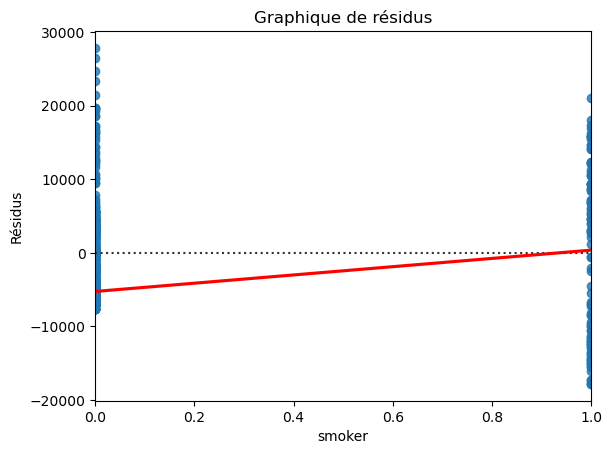

In [52]:
residuals = y_test - y_predicted

sns.residplot(x=x_test["smoker"], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("smoker")
plt.ylabel("Résidus")
plt.title("Graphique de résidus")
plt.show()

Les résidus montrent une tendance non linéaire

# Polynomial transformation

In [104]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[["smoker"]])
    x_test_pr = pr.fit_transform(x_test[["smoker"]])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

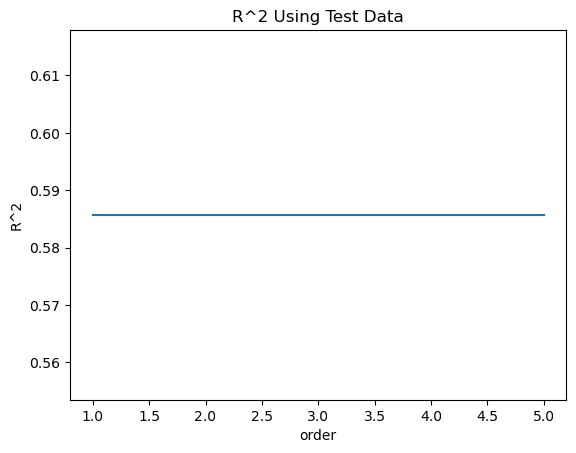

In [105]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Pour n'importe quel degré, le R^2 n'évolue pas. Le degré 2 est sélectionné

In [107]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[["smoker"]])
x_test_pr = pr.fit_transform(x_test[["smoker"]])
lr.fit(x_train_pr,y_train)
y_hat = lr.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.5856931924125184


In [108]:
print("test score:", lr.score(x_test_pr, y_test))
print("train score:", lr.score(x_train_pr, y_train))

test score: 0.5856931924125184
train score: 0.6313358040621517


Pas de surajustement

# Ridge

In [109]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RM = Ridge(alpha=alpha) 
    RM.fit(x_train_pr, y_train)
    test_score, train_score = RM.score(x_test_pr, y_test), RM.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:07<00:00, 126.56it/s, Test Score=0.586, Train Score=0.631]


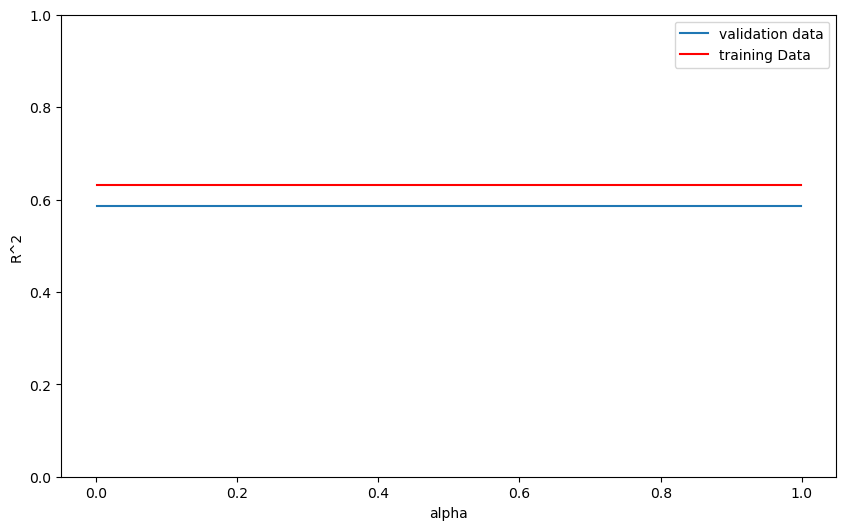

In [110]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [111]:
index_max = np.argmax(Rsqu_test)

alpha_optimal = Alpha[index_max]

print(f"Alpha optimal : {alpha_optimal}")

Alpha optimal : 0.999


L'alpha optimal est 1

In [114]:
RM = Ridge(alpha=1)
RM.fit(x_train_pr,y_train)
yhat = RM.predict(x_test_pr)
print(r2_score(y_test,yhat))
print("test score:", RM.score(x_test_pr, y_test))
print("train score:", RM.score(x_train_pr, y_train))

0.5857863307020179
test score: 0.5857863307020179
train score: 0.6313345962088661


Pas de surajustement

# Age, BMI, Smoker

In [115]:
X = x_train[["age","bmi","smoker"]]
X_test = x_test[["age","bmi","smoker"]]

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

# Linear Regression

In [117]:
lr = LinearRegression()
lr.fit(X_scaled,y_train)
lr.score(X_scaled,y_train)

0.7535487795992983

Ce modèle a une meilleure capacité d'interprétation (75%) des prix que le modèle avec la variable smoker seule. 

In [118]:
y_train_pred = lr.predict(X_scaled)
y_predicted = lr.predict(X_test_scaled)

# Calcul des scores R-squared pour l'ensemble d'entraînement et de test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_predicted)

print(f"R-squared sur l'ensemble d'entraînement : {r2_train}")
print(f"R-squared sur l'ensemble de test : {r2_test}")

R-squared sur l'ensemble d'entraînement : 0.7535487795992983
R-squared sur l'ensemble de test : 0.7191802916256882


Pas de surajustement du modèle

In [119]:
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 39307784.365388766
rmse =  6269.592041384253
mae = 4308.303269949893


In [120]:
taux_diff_rmse = np.sqrt(mse)*100/y_test.mean()
print(round(taux_diff_rmse),'%')

47 %


L'erreur quadratique représente 47% de la moyenne des prix

In [121]:
taux_diff_mae = mae*100/y_test.mean()
print(round(taux_diff_mae),'%')

33 %


L'erreur absolue représente 33% de la moyenne des prix

# Polynomial transformation

In [122]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(X_scaled)
    x_test_pr = pr.fit_transform(X_test_scaled)
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

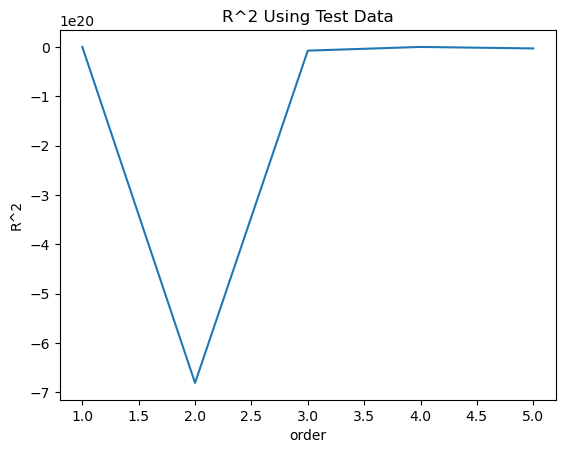

In [123]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le R^2 est plus élevé au degré 4

# Linear Regression

In [128]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(X_scaled)
x_test_pr = pr.fit_transform(X_test_scaled)
lr.fit(x_train_pr,y_train)
y_hat = lr.predict(x_test_pr)
print(r2_score(y_test,y_hat))

-2.7411295719507804e+16


# Ridge

In [129]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RM = Ridge(alpha=alpha) 
    RM.fit(x_train_pr, y_train)
    test_score, train_score = RM.score(x_test_pr, y_test), RM.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:08<00:00, 113.52it/s, Test Score=0.806, Train Score=0.852]


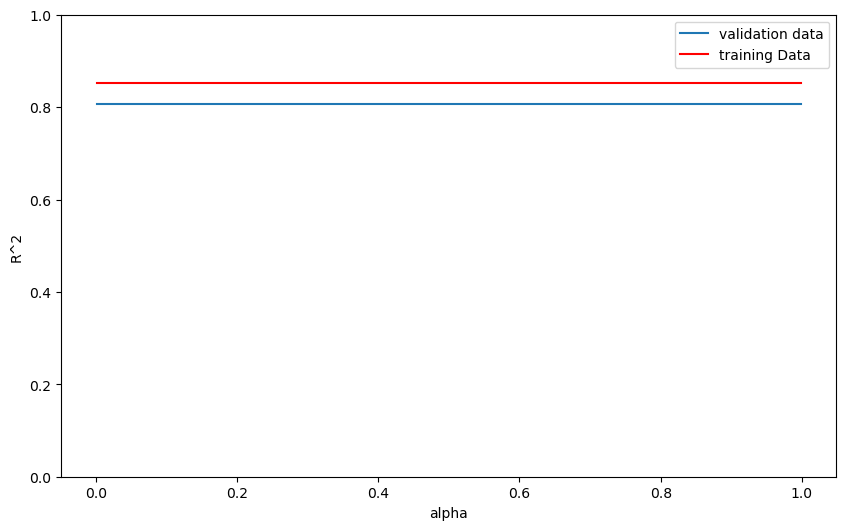

In [130]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [131]:
index_max = np.argmax(Rsqu_test)

alpha_optimal = Alpha[index_max]

print(f"Alpha optimal : {alpha_optimal}")

Alpha optimal : 0.999


L'Alpha optimal est de 1

In [132]:
RM = Ridge(alpha=1)
RM.fit(x_train_pr,y_train)
yhat = RM.predict(x_test_pr)
print(r2_score(y_test,yhat))
print("test score:", RM.score(x_test_pr, y_test))
print("train score:", RM.score(x_train_pr, y_train))

0.8062388246218228
test score: 0.8062388246218228
train score: 0.8523311399556887


Pas de surajustement. Le modèle est performant

In [133]:
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 27121752.045969907
rmse =  5207.854841100116
mae = 3122.296632667101


In [134]:
taux_diff_rmse = np.sqrt(mse)*100/y_test.mean()
print(round(taux_diff_rmse),'%')

39 %


L'erreur quadratique représente 39% de la moyenne des prix

In [136]:
taux_diff_mae = mae*100/y_test.mean()
print(round(taux_diff_mae),'%')

24 %


L'erreur absolue représente 24% de la moyenne des prix

# Toutes les features

In [137]:
X = x_train[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
X_test = x_test[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]

In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

# Linear Regression

In [139]:
lr = LinearRegression()
lr.fit(X_scaled,y_train)
lr.score(X_scaled,y_train)

0.7563493236264813

Ce modèle a une bonne capacité d'interprétation (76%) des prix.

In [140]:
y_train_pred = lr.predict(X_scaled)
y_predicted = lr.predict(X_test_scaled)

# Calcul des scores R-squared pour l'ensemble d'entraînement et de test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_predicted)

print(f"R-squared sur l'ensemble d'entraînement : {r2_train}")
print(f"R-squared sur l'ensemble de test : {r2_test}")

R-squared sur l'ensemble d'entraînement : 0.7563493236264813
R-squared sur l'ensemble de test : 0.724592897658537


Pas de surajustement du modèle

In [142]:
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 38550153.95538052
rmse =  6208.877028527826
mae = 4267.676992003387


In [143]:
taux_diff_rmse = np.sqrt(mse)*100/y_test.mean()
print(round(taux_diff_rmse),'%')

47 %


L'erreur quadratique représente 47% de la moyenne des prix

In [144]:
taux_diff_mae = mae*100/y_test.mean()
print(round(taux_diff_mae),'%')

32 %


L'erreur absolue représente 32% de la moyenne des prix

# Polynomial transformation

In [72]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(X_scaled)
    x_test_pr = pr.fit_transform(X_test_scaled)
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

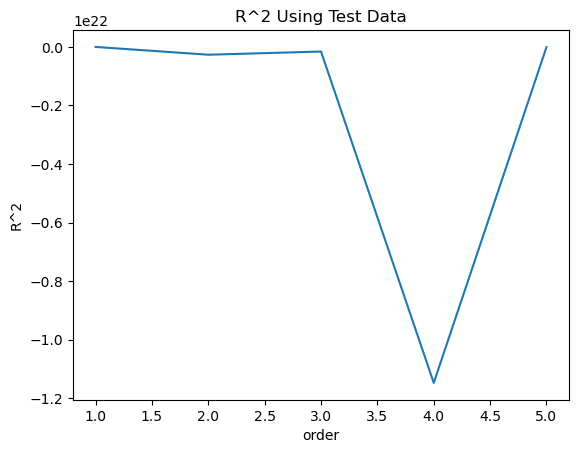

In [73]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le score chute au degré 3

# Linear Regression

In [85]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(X_scaled)
x_test_pr = pr.fit_transform(X_test_scaled)
lr.fit(x_train_pr,y_train)
y_hat = lr.predict(x_test_pr)
print(r2_score(y_test,y_hat))
print("test score:", lr.score(x_test_pr, y_test))
print("train score:", lr.score(x_train_pr, y_train))

-1.5803595695072415e+20
test score: -1.5803595695072415e+20
train score: 0.8603913773246941


Surajustement du modèle  

# RIDGE

In [97]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RM = Ridge(alpha=alpha) 
    RM.fit(x_train_pr, y_train)
    test_score, train_score = RM.score(x_test_pr, y_test), RM.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:10<00:00, 96.80it/s, Test Score=0.815, Train Score=0.86] 


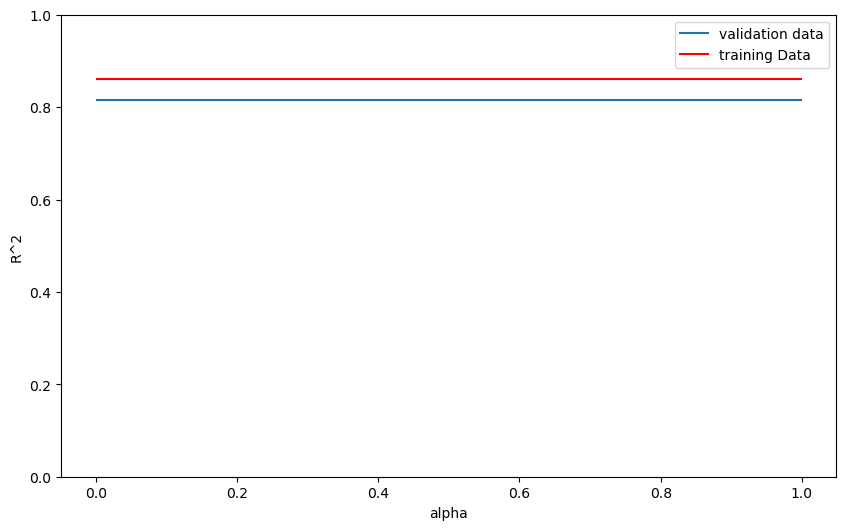

In [98]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [99]:
index_max = np.argmax(Rsqu_test)

alpha_optimal = Alpha[index_max]

print(f"Alpha optimal : {alpha_optimal}")

Alpha optimal : 0.999


L'alpha optimal est de 1

In [100]:
RM = Ridge(alpha=0.1)
RM.fit(x_train_pr,y_train)
yhat = RM.predict(x_test_pr)
print(r2_score(y_test,yhat))
print("test score:", RM.score(x_test_pr, y_test))
print("train score:", RM.score(x_train_pr, y_train))

0.8152063763732074
test score: 0.8152063763732074
train score: 0.8603931378546793


La régression Ridge peut être plus adaptée lorsqu'on travaille avec des transformations polynomiales ou des données hautement corrélées.
Le modèle Ridge a supprimer le surajustement.

In [101]:
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)

print('mse =', mse)
print('rmse = ', np.sqrt(mse))
print('mae =', mae)

mse = 25866517.530666437
rmse =  5085.913637751474
mae = 2894.9162144758084


In [102]:
taux_diff_rmse = np.sqrt(mse)*100/y_test.mean()
print(round(taux_diff_rmse),'%')

38 %


L'erreur quadratique représente 38% de la moyenne des prix

In [103]:
taux_diff_mae = mae*100/y_test.mean()
print(round(taux_diff_mae),'%')

22 %


L'erreur absolue représente 22% de la moyenne des prix

# Le modèle le plus performant est celui de la régression Ridge avec toutes les features avec un score d'entraînement à 86% et un score de test à 82%. Les MAE et RMSE sont les plus basses.